## HOMEWORK MACHINE LEARNING PREPARATION

### Stage 1

KELOMPOK 4 <br>
PAK APRI BISA <br>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
df = pd.read_csv('aug_train.csv')
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


## 1. Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Pengamatan\:
1. Data terdiri dari 19.158 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

### Statistical Summary

In [93]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['city_development_index', 'training_hours', 'target']
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [24]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


Beberapa pengamatan:
1. Kolom `city_development_index` dan `target` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `target` dan `training_hours` tampaknya skew ke kanan (long-right tail)
3. Kolom `city_developmet_index`  tampaknya skew ke kiri (long-left tail)
3. Kolom `training_hours` dan `target` ternyata bernilai boolean/binary

In [25]:
# categorical columns 
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 80% dari jumlah baris data) oleh kaum Male (`gender`), memiliki pengalaman (`relevant_experience`), major_discipline dipenuhi STEM (`major_discipline`) dan berpendidikan S1 (`education_level`)
2. Kolom city memiliki kardinalitas (jumlah unique values) yang cukup tinggi (123). 

### Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [26]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts            

### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
* Total data ada 19158
* Pada kolom `target` bisa diganti jadi booelan karena berupa binary 0 atau 1, atau bisa jadi object, menjadi stay or no

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
* Terdapat kolom yang memiliki nilai kosong yaitu pada kolom `gender`, `enrolled_university`, `education_level`, `major_disciplin`, `experience`, `company_size`, `company_type`, dan `last_new_job`

### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
* Kolom `enrollee_id` bisa dihapus karena hanya sebagai identifier
* Angka min pada kolom `city_development_index` jauh dengan median, malah median cenderung lebih dekat dengan max
* Pada kolom `training_hours`, nilai mean dan median cukup jauh gap nya, dan nilai max sangat jauh dari mean
* Pada kolom `city` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (123), jadi bisa di drop
* Pada kolom `experience` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (22), jadi bisa di drop
* Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh STEM (`major_discipline`), memiliki pengalaman yang relevan (`relevent_experience`), tidak enrolled perguruan tinggi (`enrolled_university`) dan didominasi oleh Pria (`gender`)

## 2. Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

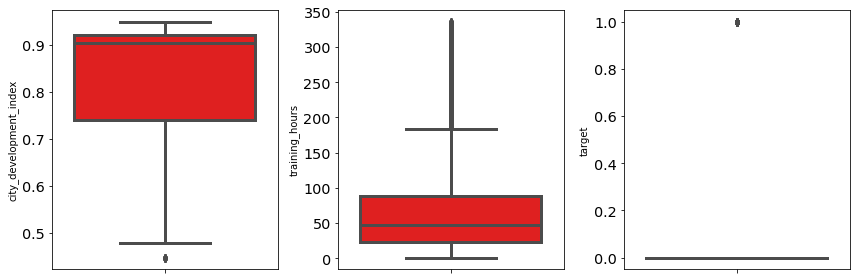

In [27]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
1. Outlier terlihat utamanya pada kolom `city_development` dan `training_hours`
2. Dari boxplotnya juga tampak mana distribusi yang terlihat agak *skewed*: `city_development` dan `training_hours`

### Dist Plot

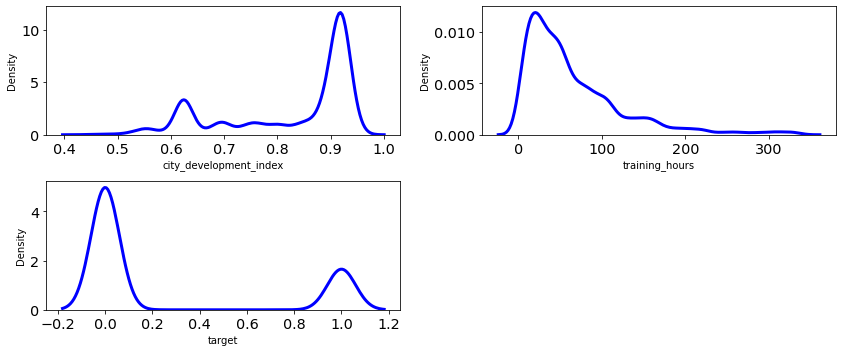

In [80]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
1. kolom `training_hours` skew ke kanan (positif), perlu action pada kolom tersebut
2. kolom `city_development_index` skew ke kiri (negatif), perlu action pada kolom tersebut
3. kolom `target` biner

### Violin plots

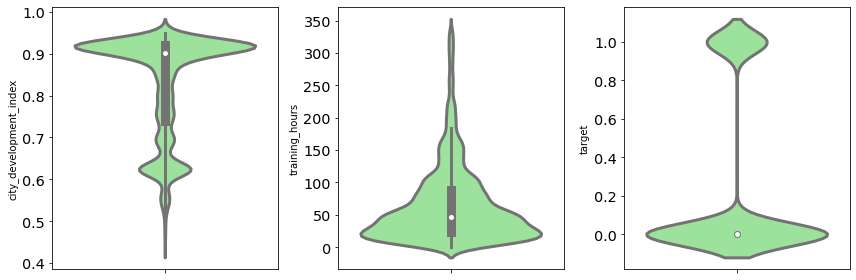

In [30]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='lightgreen', orient='v')
    plt.tight_layout()

Alternatif dari kedua plot di atas adalah violin plot. Dengan melihat violin plot di atas, *insight* yang kita temukan ketika melihat box plot dan distribution plot juga dapat diamati.
1. Dapat dilihat penyebaran data dari masing-masing variabel
2. Sehingga dapat dimungkinkan mengapa variabel `target` tidak terlihat di distribution plot

## Count Plots

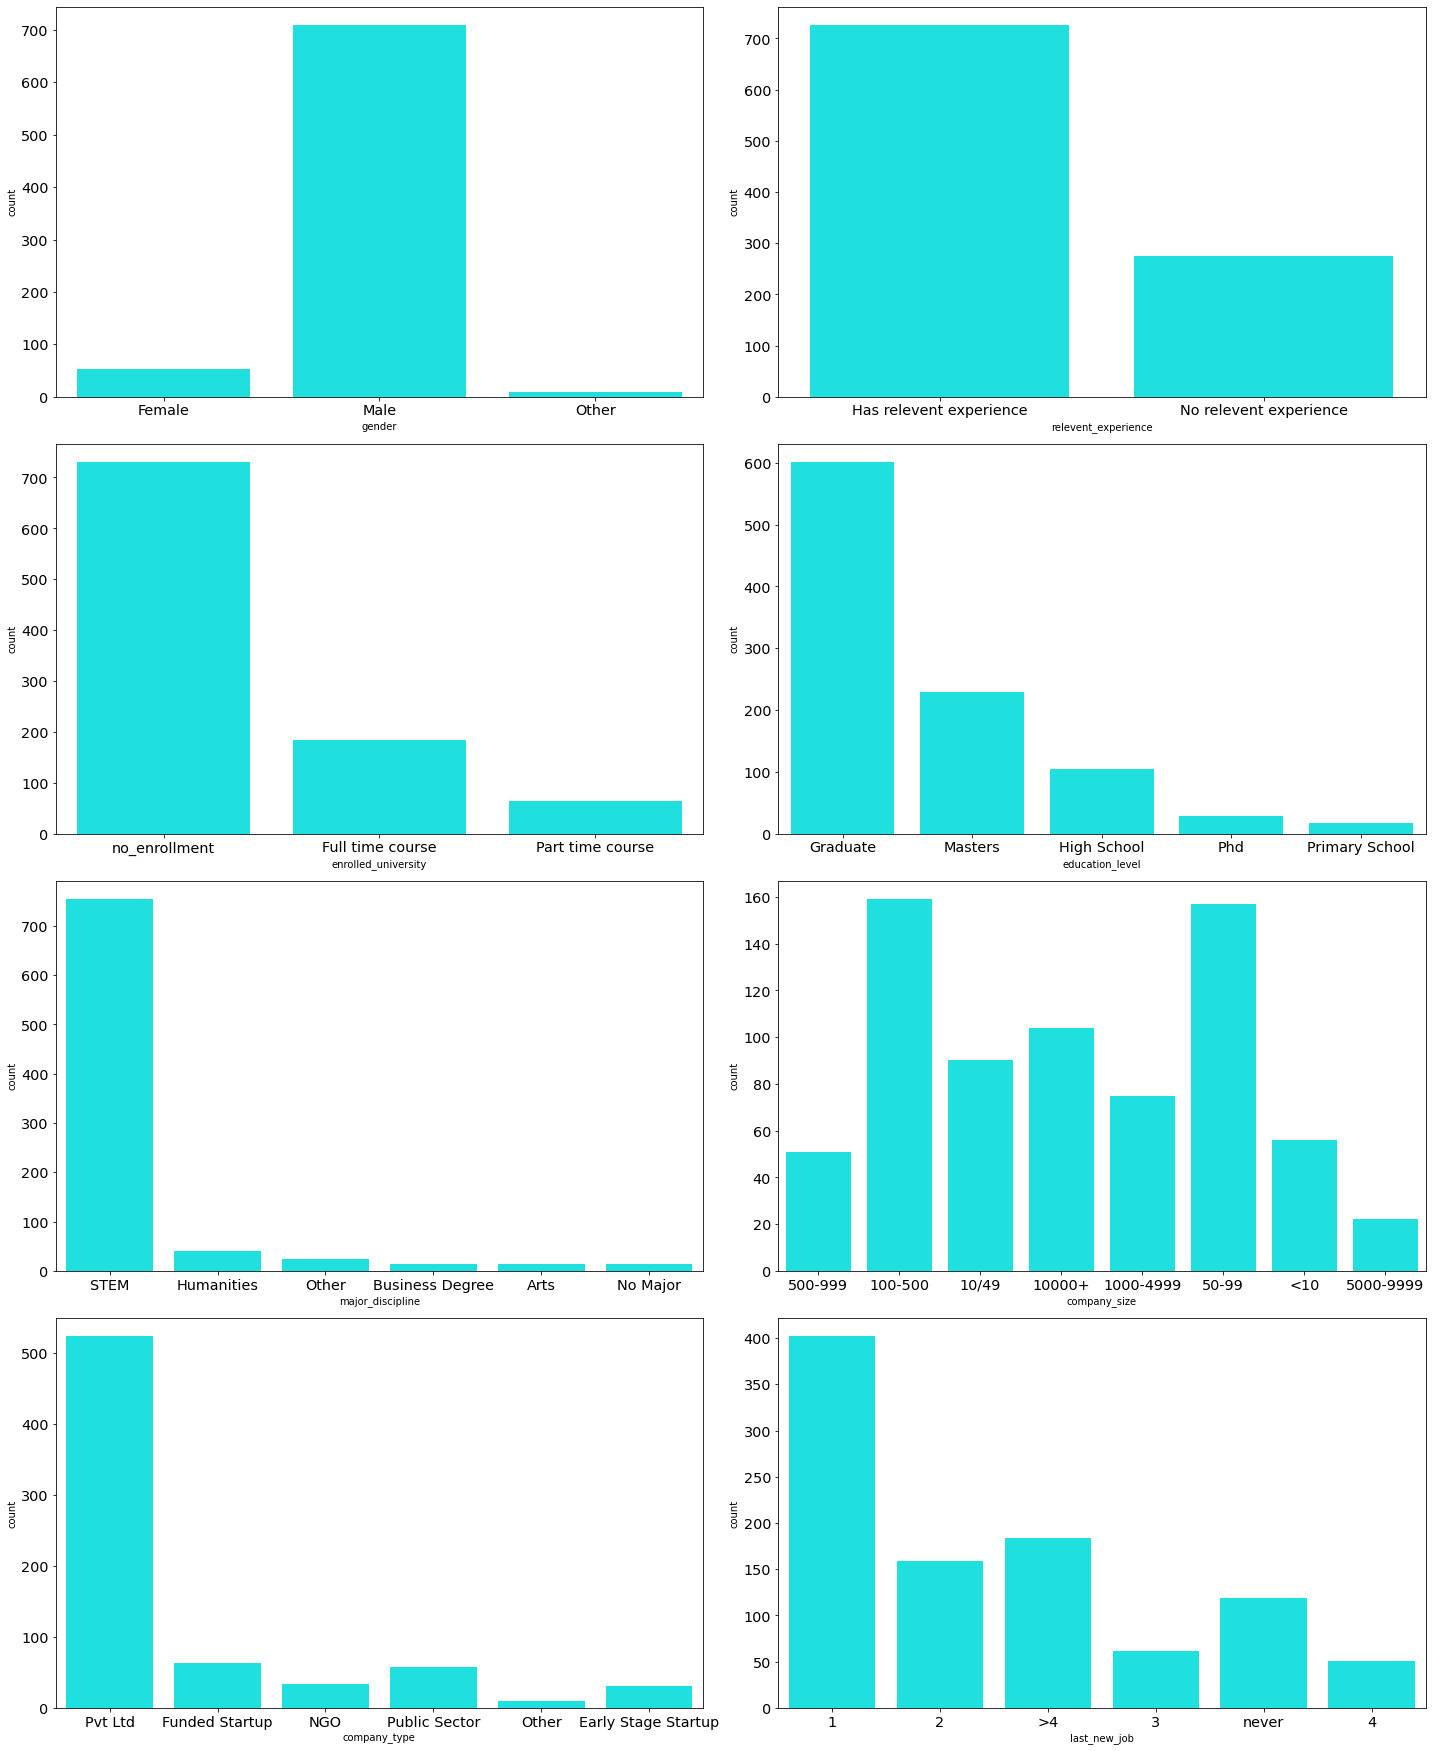

In [88]:
df_sample = df.sample(1000, random_state=42)
plt.figure(figsize=(20, 30))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x = df_sample[cats[i]], color='cyan', orient='v')
    plt.tight_layout()

kolom `gender`, `major_discipline`, `enrolled_university`, `education_level` `company_type` didominasi oleh satu 1-2 value

## 3. Multivariate Analysis

### Correlation Heat Map

In [73]:
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


<AxesSubplot:>

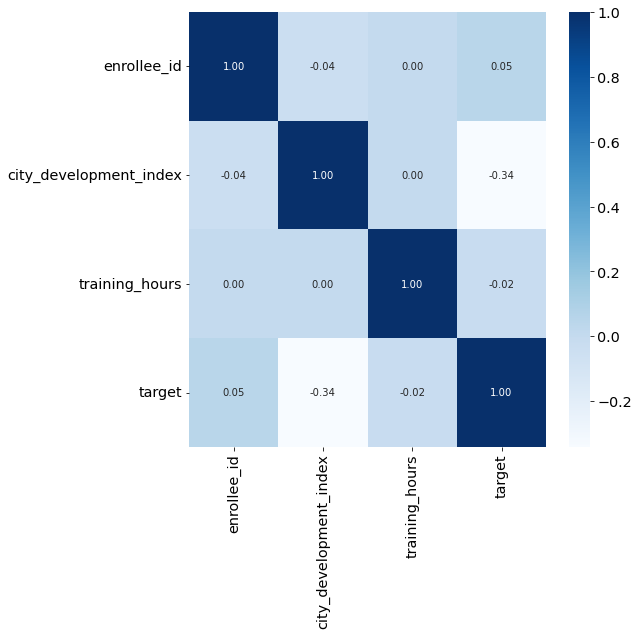

In [72]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *Correlative Map* dapat dilihat bahwa :
1. Target pada kolom `target` memiliki korelasi cukup kuat dengan `city_development_index'
2. `target` juga mempunyai korelasi positif meskipun rendah terhadap `enrollee_id` dan `training_hours`

### Pair plot

<Figure size 720x720 with 0 Axes>

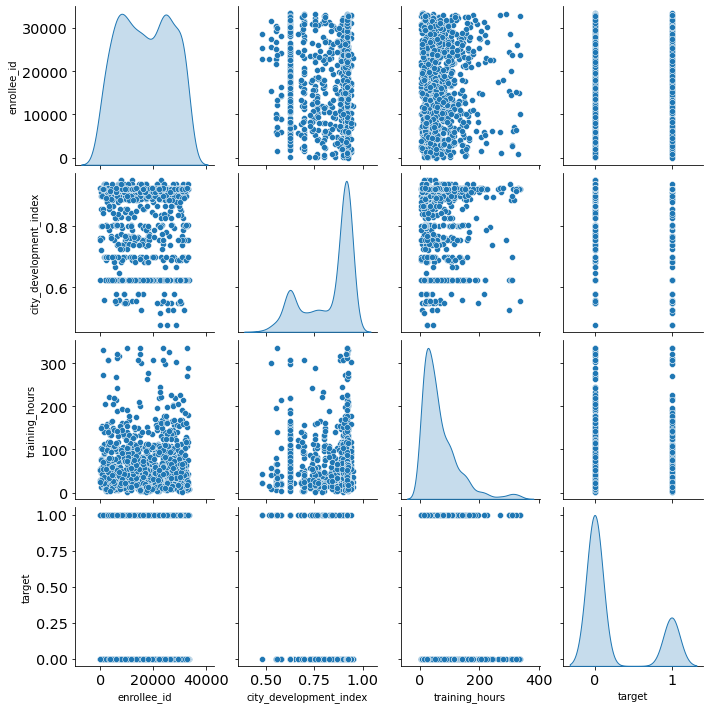

In [70]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_sample, diag_kind='kde')

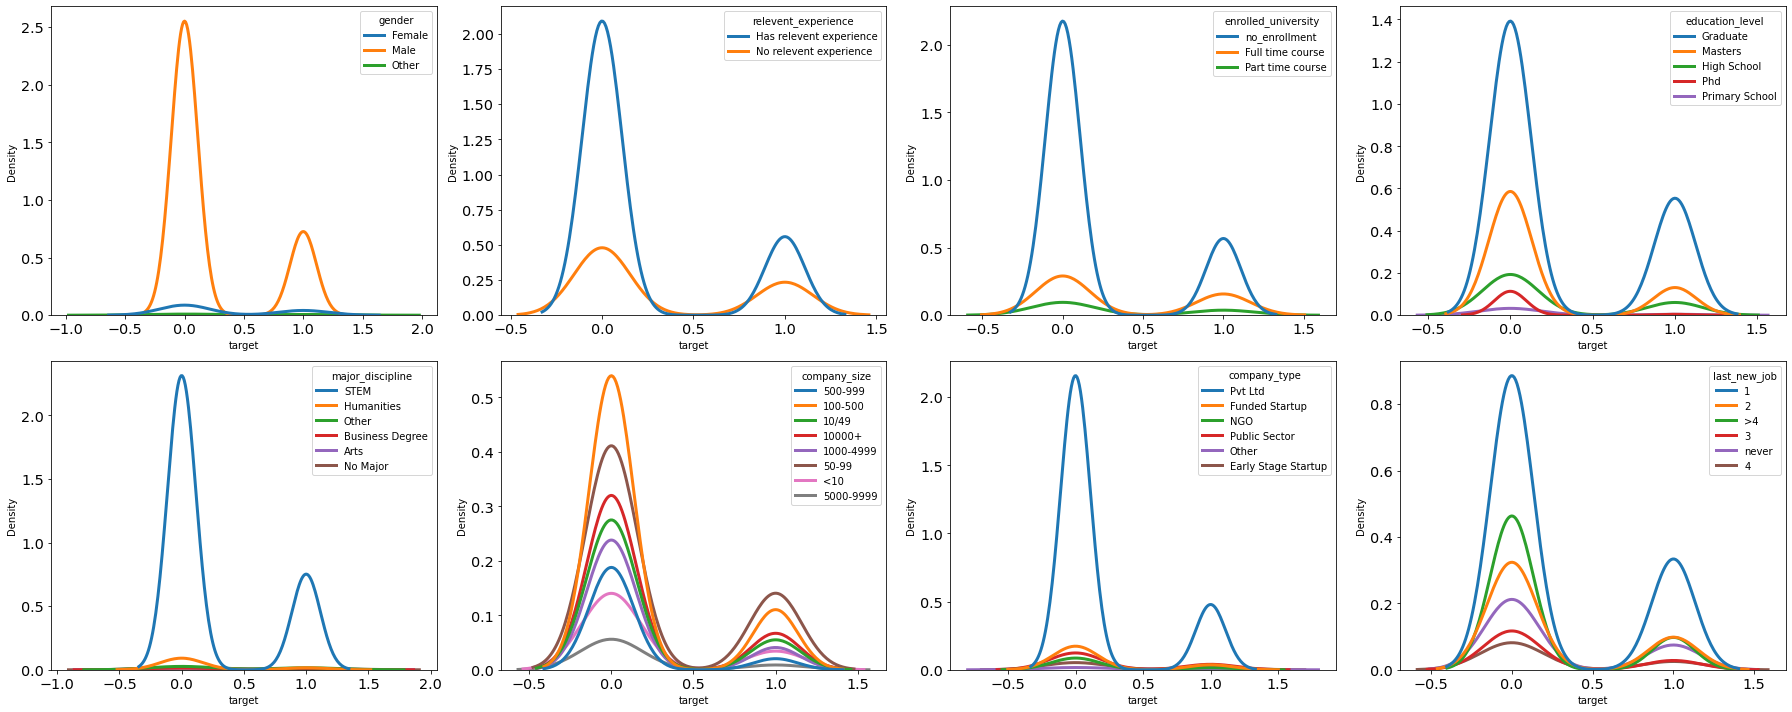

In [87]:
cats.remove('experience')
cats.remove('city')
features = cats
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) 
    sns.kdeplot(data=df_sample, x='target', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

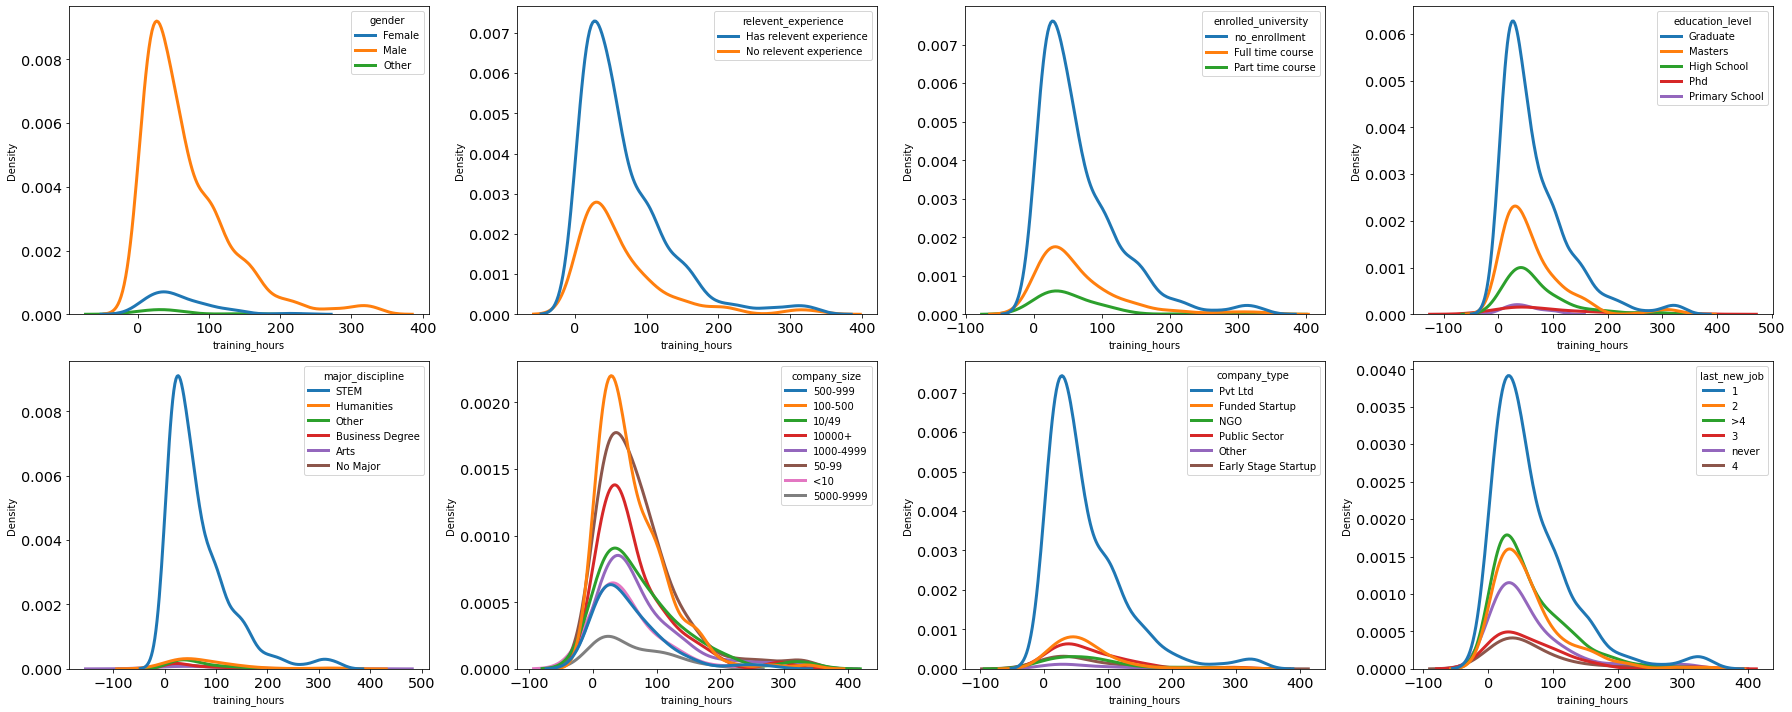

In [92]:
cats.remove('experience')
cats.remove('city')
features = cats
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) 
    sns.kdeplot(data=df_sample, x='training_hours', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:
1. Pada `company_size`, 100-500 cenderung bertahan, sedangkan 50-99 cenderung mencari pekerjaan pada perusahaan lain
2. selebihnya sama sesuai dengan data paling banyak

## 4. Bussiness Insight

Bussiness Insights:


- Pada plot `gender` dapat dilihat bahwa jumlah `male` lebih besar daripada `female` dan `other` untuk tetap stay di perusahaan tersebut.
- Trainee yang memiliki **pengalaman yang relevant lebih banyak yang stay** di perusahaan tersebut dibandingkan yang tidak memiliki pengalaman yang relevant.
- Trainee yang statusnya `no_enrollment` lebih banyak yang stay di perusahaan tersebut dibandingkan yang lainnya. 
- Trainee dengan education level `Graduate` lebih banyak yang stay di perusahaan tersebut dibandingkan yang lainnya. 
- Overall dari plot-plot diatas kita bisa melihat bahwa **jumlah trainee yang stay lebih banyak** dibandingkan dengan yang tidak stay.